# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [225]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import adjusted_rand_score

from sklearn.ensemble import IsolationForest
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

## Load the Data

In [226]:
df = pd.read_csv('Traffic_Accidents.csv')
df.head()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [227]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52000 entries, 0 to 51999
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        52000 non-null  float64
 1   Location_Northing_OSGR                       52000 non-null  float64
 2   Longitude                                    52000 non-null  float64
 3   Latitude                                     52000 non-null  float64
 4   Police_Force                                 52000 non-null  int64  
 5   Accident_Severity                            51678 non-null  float64
 6   Number_of_Vehicles                           52000 non-null  int64  
 7   Number_of_Casualties                         50959 non-null  float64
 8   Date                                         52000 non-null  object 
 9   Day_of_Week                                  52000 non-null  int64  
 10

In [228]:
df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(include='object')
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Location_Easting_OSGR,52000.0,440284.256846,95109.751221,98480.000000,375540.000000,440950.000000,523500.000000,6.549600e+05
Location_Northing_OSGR,52000.0,299861.656788,161362.379650,19030.000000,178010.000000,267180.000000,398149.250000,1.203900e+06
Longitude,52000.0,-1.427193,1.398249,-6.895268,-2.366190,-1.391202,-0.214666,1.753632e+00
Latitude,52000.0,52.586684,1.453049,50.026153,51.487676,52.295042,53.478016,6.071477e+01
Police_Force,52000.0,30.401712,25.545581,1.000000,7.000000,30.000000,46.000000,9.800000e+01
Accident_Severity,51678.0,2.837145,0.402582,1.000000,3.000000,3.000000,3.000000,3.000000e+00
Number_of_Vehicles,52000.0,1.834327,0.727856,1.000000,1.000000,2.000000,2.000000,3.400000e+01
Number_of_Casualties,50959.0,1.354756,0.855220,1.000000,1.000000,1.000000,1.000000,5.100000e+01
Day_of_Week,52000.0,4.130712,1.926217,1.000000,2.000000,4.000000,6.000000,7.000000e+00
Local_Authority_(District),52000.0,349.542558,259.504721,1.000000,112.000000,323.000000,530.000000,9.410000e+02


In [229]:
df_cat.describe().T

,count,unique,top,freq
Date,52000,3286,04/11/2005,43
Local_Authority_(Highway),52000,206,E10000016,1465
Road_Type,52000,6,Single carriageway,38852
Pedestrian_Crossing-Human_Control,52000,3,None within 50 metres,51718
Pedestrian_Crossing-Physical_Facilities,52000,6,No physical crossing within 50 meters,43368
Light_Conditions,51456,5,Daylight: Street light present,37734
Weather_Conditions,52000,9,Fine without high winds,41662
Road_Surface_Conditions,52000,6,Dry,35727
Did_Police_Officer_Attend_Scene_of_Accident,52000,2,Yes,42143


In [230]:
df.duplicated().sum()

43

In [231]:
df.isnull().sum()

Location_Easting_OSGR                             0
Location_Northing_OSGR                            0
Longitude                                         0
Latitude                                          0
Police_Force                                      0
Accident_Severity                               322
Number_of_Vehicles                                0
Number_of_Casualties                           1041
Date                                              0
Day_of_Week                                       0
Local_Authority_(District)                        0
Local_Authority_(Highway)                         0
1st_Road_Class                                    0
1st_Road_Number                                   0
Road_Type                                         0
Speed_limit                                       0
2nd_Road_Class                                    0
2nd_Road_Number                                   0
Pedestrian_Crossing-Human_Control                 0
Pedestrian_C

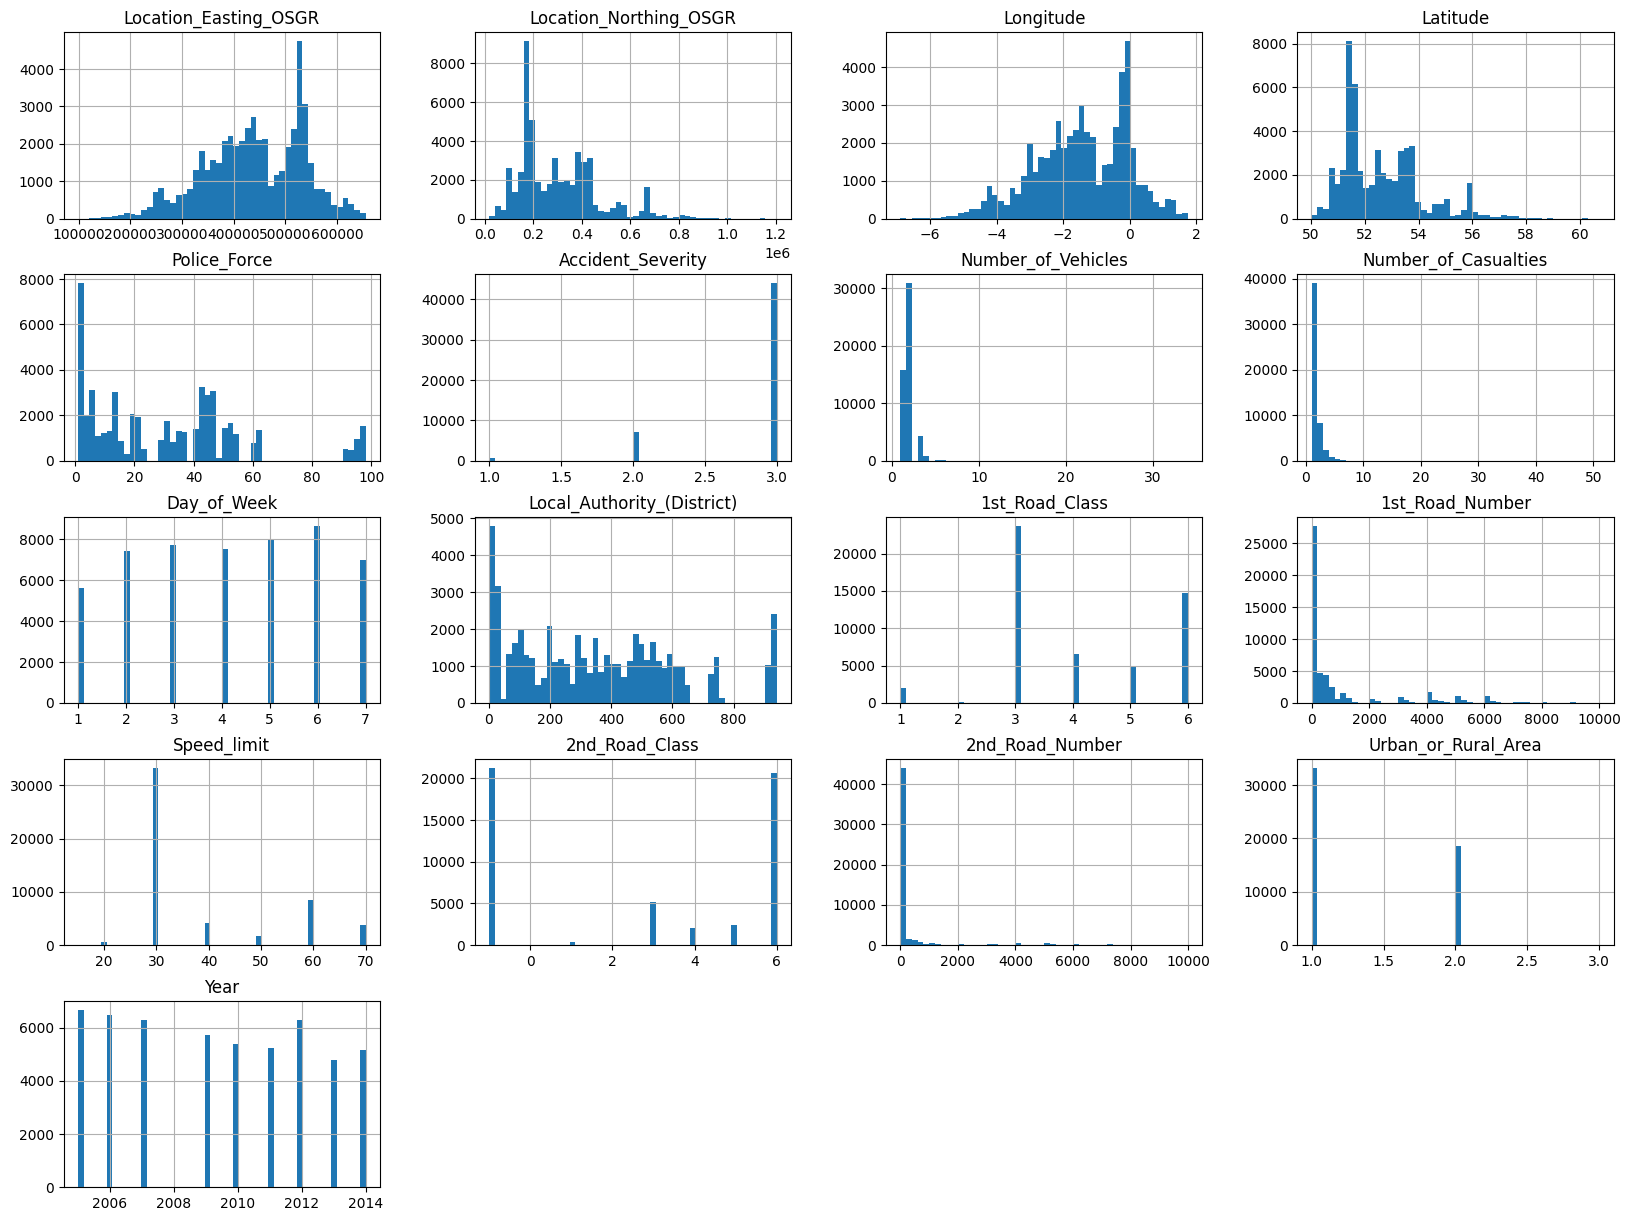

In [232]:
df_num.hist(bins=50, figsize=(20,15));

<Axes: >

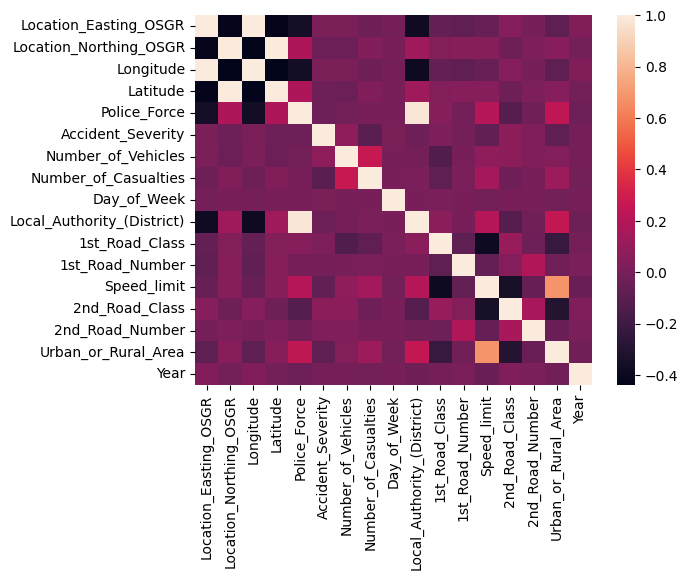

In [233]:
sns.heatmap(df_num.corr())

## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [234]:
df = df[['Longitude', 'Latitude','Accident_Severity','Speed_limit','Weather_Conditions','Number_of_Vehicles']]


In [235]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [236]:
#Handling Missing Values
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
imputer_mean = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer_mean.fit_transform(df[numerical_cols])

categorical_cols = df.select_dtypes(include=['object']).columns
imputer_mode = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_mode.fit_transform(df[categorical_cols])


In [237]:
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [238]:
#outliers
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['outliers'] = iso_forest.fit_predict(df)
df = df[df['outliers'] != -1].drop('outliers', axis=1)

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<Axes: xlabel='Longitude', ylabel='Latitude'>

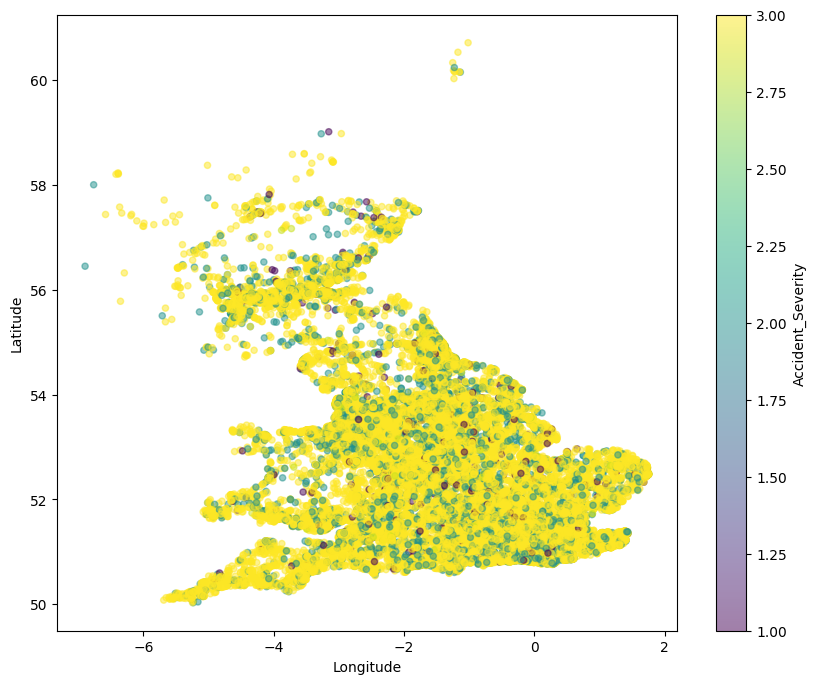

In [252]:
df.plot(x='Longitude', y='Latitude', kind='scatter', c='Accident_Severity', colormap='viridis', figsize=(10, 8), alpha=0.5)

# Scaleing

In [240]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [241]:
pca = PCA(n_components=0.8)
x_pca = pca.fit_transform(X_scaled)

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

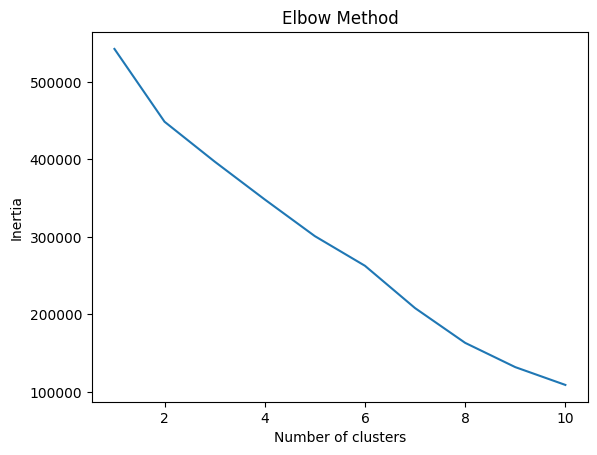

In [242]:
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x_pca)
    inertia.append(kmeans.inertia_)
plt.plot(range(1, 11), inertia)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [243]:
kmeans = KMeans(n_clusters=8, random_state=42)
kmeans.fit(x_pca)
y_pred = kmeans.predict(x_pca)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [244]:
sil_score = silhouette_score(x_pca, y_pred)
print(f"Silhouette Score: {sil_score}")

db_index = davies_bouldin_score(x_pca, y_pred)
print(f"Davies-Bouldin Index: {db_index}")



Silhouette Score: 0.34275494873261697
Davies-Bouldin Index: 0.7275384060982262


## Plot the data points with their predicted cluster center

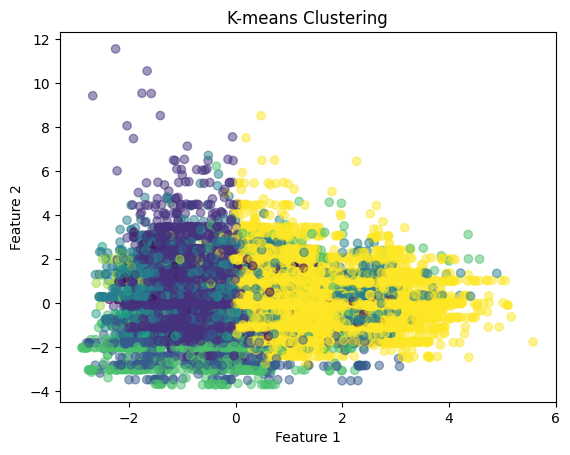

In [246]:
plt.scatter(x_pca[:, 1], x_pca[:, 2], c=y_pred ,alpha=0.5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering')
plt.show()

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

- i used 'Longitude', 'Latitude','Accident_Severity','Speed_limit','Weather_Conditions','Number_of_Vehicles' because im trying to group by the location and the Accident_Severity
- i used 8 clusters because in using the location and i used the Elbow Method to find that
-
- i used 'Silhouette Score' to find the space between classes and 'Davies-Bouldin Index' for average similarity of each cluster 
- 'Silhouette Score' and 'Davies-Bouldin Index'  helped me to how well the Clustering worked
-
- i thank the data is not expected enough like the '2nd_Road_Number' i have no idea what that does 